In [2]:
from scipy.linalg import expm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Omegat(t, Omega, t_shape, t_pulse):
    return np.piecewise(t, [t < t_shape, ((t >= t_shape) & (t <= t_pulse - t_shape)), t > t_pulse - t_shape],
                        [lambda t: np.sin(np.pi / 2 * t / t_shape) ** 2 * Omega,
                         Omega,
                        lambda t: np.sin(np.pi / 2 * (t_pulse - t) / t_shape) ** 2 * Omega])

In [4]:
t = np.linspace(0, 4, 1000)
y = Omegat(t, 1, 1, 4)

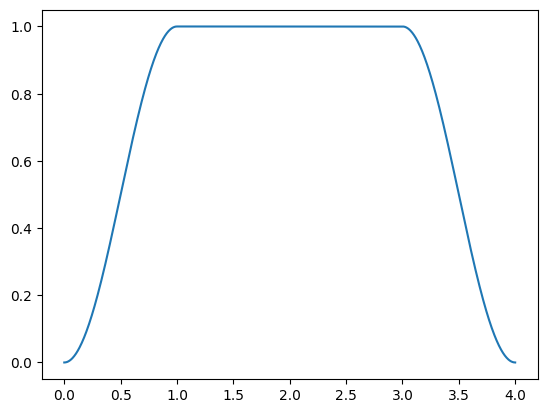

In [5]:
plt.plot(t, y)

In [5]:
sigmax = 1/2*np.array([[0, 1], [1, 0]])
sigmaz = 1/2*np.array([[1, 0], [0, -1]])

## No pulse shaping

In [36]:
Delta = 7
Omega = 0.5
H = 2*np.pi*Delta*sigmaz + 2*np.pi*Omega*sigmax

In [37]:
dT = 0.001
T = np.arange(0, 10, dT)
UdeltaT = expm(-1j*H*dT)
Utotal = np.linalg.matrix_power(UdeltaT, len(T))

In [38]:
np.abs(Utotal[0, 1])**2+np.abs(Utotal[1, 1])**2

0.999999999997752

In [39]:
pop_excitation = []

for i in range(len(T)):
    U = np.linalg.matrix_power(UdeltaT, i)
    pop_excitation.append(np.abs(U[0, 1])**2)

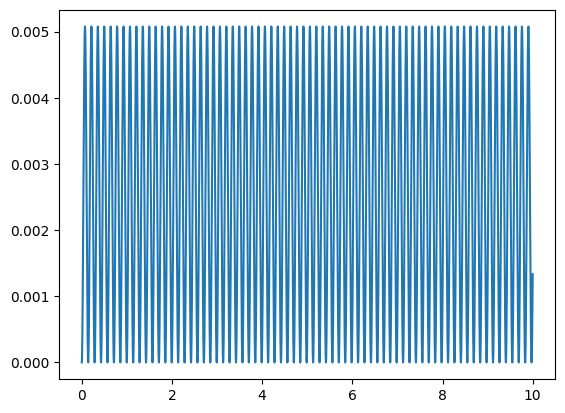

In [40]:
plt.plot(T, pop_excitation)

In [19]:
0.2**2/(7**2+0.2**2)

0.0008156606851549757

## pulse shaping

In [83]:
Delta = 5
Omega = 0.2
t_shape = 0.1

In [84]:
def H_pulseshaping(t, Omega, t_shape, t_pulse):
    H = 2*np.pi*Delta*sigmaz + 2*np.pi*Omegat(t, Omega, t_shape, t_pulse)*sigmax
    return H
    
def U_total(T, Omega, Delta, t_shape):
    dT = 0.005
    tlist = np.arange(0, T, dT)
    Utotal = np.array([[1, 0], [0, 1]])
    for i in range(len(tlist)):
        Utotal = expm(-1j*H_pulseshaping(tlist[i], Omega, t_shape, T)*dT)@Utotal
    
    return Utotal
    


In [85]:
import time
t0=time.time()
U_total(5, Omega, Delta, t_shape)
print(time.time()-t0)

0.2535374164581299


In [81]:
Tlist = np.linspace(2*t_shape, 2, 60)
pop_excitation = []
for j in range(len(Tlist)):
    U = U_total(Tlist[j], Omega, Delta, t_shape)
    pop_excitation.append(np.abs(U[0, 1])**2)

In [57]:
np.abs(U[0, 1])**2+np.abs(U[1, 1])**2

1.0000000000000866

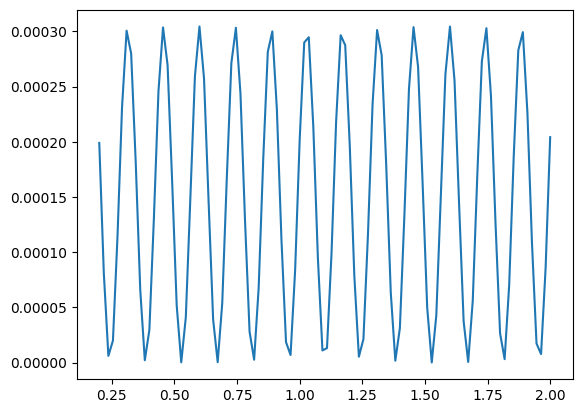

In [82]:
plt.plot(Tlist, pop_excitation)

In [86]:
t_shape_list = np.linspace(0.05, 1, 20)
pop_max = []
for t_shape in t_shape_list:
    Tlist = np.linspace(2*t_shape, 2, 60)
    pop_excitation = []
    for j in range(len(Tlist)):
        U = U_total(Tlist[j], Omega, Delta, t_shape)
        pop_excitation.append(np.abs(U[0, 1])**2)
    pop_max.append(np.max(pop_excitation))

Text(0, 0.5, 'unresonant excitation')

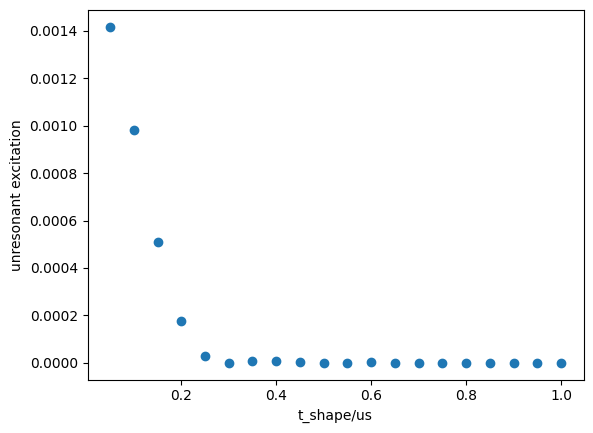

In [89]:
plt.plot(t_shape_list, pop_max, 'o')
plt.xlabel("t_shape/us")
plt.ylabel("unresonant excitation")

In [88]:
pop_max

[0.0014170004007665435,
 0.0009833167900106157,
 0.0005100302713380714,
 0.00017695787785807054,
 2.8873939847747272e-05,
 1.6735630661295596e-10,
 6.292603403606547e-06,
 7.064094571551775e-06,
 2.1346518743387515e-06,
 2.497056635464037e-11,
 9.346015904701078e-07,
 1.2983022176899236e-06,
 4.646621332409344e-07,
 9.623921647801445e-12,
 2.622059041849888e-07,
 4.0079133594053067e-07,
 1.554736441953162e-07,
 5.193755193327787e-12,
 5.080993155019888e-08,
 3.639815415768486e-12]